# Optimizer Example
MNIST CNN example showing comparison between dropout rates when using Adam.  This is a classification problem.

Richard Henry, 26-Jul-2024 

Adapted from Keras Documentation. https://keras.io/examples/vision/mnist_convnet/

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
plt.style.use('fivethirtyeight')

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.17.0'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

|Dataset|Architecture|Group|Type|
|:---|:---|:---|:---|
|MNIST Handwritten Digits|CNN|Dropout|Classification|

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
batch_size = 128
num_epochs = 32
drop_frac=0.2

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_core(m_frac):
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=input_shape),
            tf.keras.layers.Conv2D(32, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(64, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(m_frac),
            tf.keras.layers.Dense(num_classes, 
                                  activation="softmax"),
        ]
    )
    return model    
def model_build(mfrac):
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model=model_core(mfrac)
    model.compile(loss="categorical_crossentropy", 
                  optimizer='adam', 
                  metrics=['accuracy'])
    # Reduce variation in training...
    tf.random.set_seed(17)
    print("History Match:",mfrac)
    myHis=model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=num_epochs,
                    verbose=0)
    #print("\n")
    print("Evaluate Model:")
    score = model.evaluate(x_test, 
                           y_test, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("\n")
    #print("Timing:")
    return myHis,score

In [8]:
%%time
q=np.arange(0.00,0.75,0.05)
u=len(q)
r=np.arange(u)
s=np.zeros(u)
t=np.zeros(u)
for i in r:
    drop_frac=q[i]
    h0,s0=model_build(drop_frac)
    s[i]=s0[0]
    t[i]=s0[1]
print("Timing:")

History Match: 0.0
Evaluate Model:
Test loss: 0.05255970358848572
Test accuracy: 0.9897000193595886


History Match: 0.05
Evaluate Model:
Test loss: 0.038842663168907166
Test accuracy: 0.9914000034332275


History Match: 0.1
Evaluate Model:
Test loss: 0.03999074548482895
Test accuracy: 0.9909999966621399


History Match: 0.15000000000000002
Evaluate Model:
Test loss: 0.031575169414281845
Test accuracy: 0.9926999807357788


History Match: 0.2
Evaluate Model:
Test loss: 0.029994357377290726
Test accuracy: 0.9925000071525574


History Match: 0.25
Evaluate Model:
Test loss: 0.027475716546177864
Test accuracy: 0.9926000237464905


History Match: 0.30000000000000004
Evaluate Model:
Test loss: 0.027740951627492905
Test accuracy: 0.9926999807357788


History Match: 0.35000000000000003
Evaluate Model:
Test loss: 0.02511221542954445
Test accuracy: 0.9927999973297119


History Match: 0.4
Evaluate Model:
Test loss: 0.025103218853473663
Test accuracy: 0.9932000041007996


History Match: 0.45
Evalua

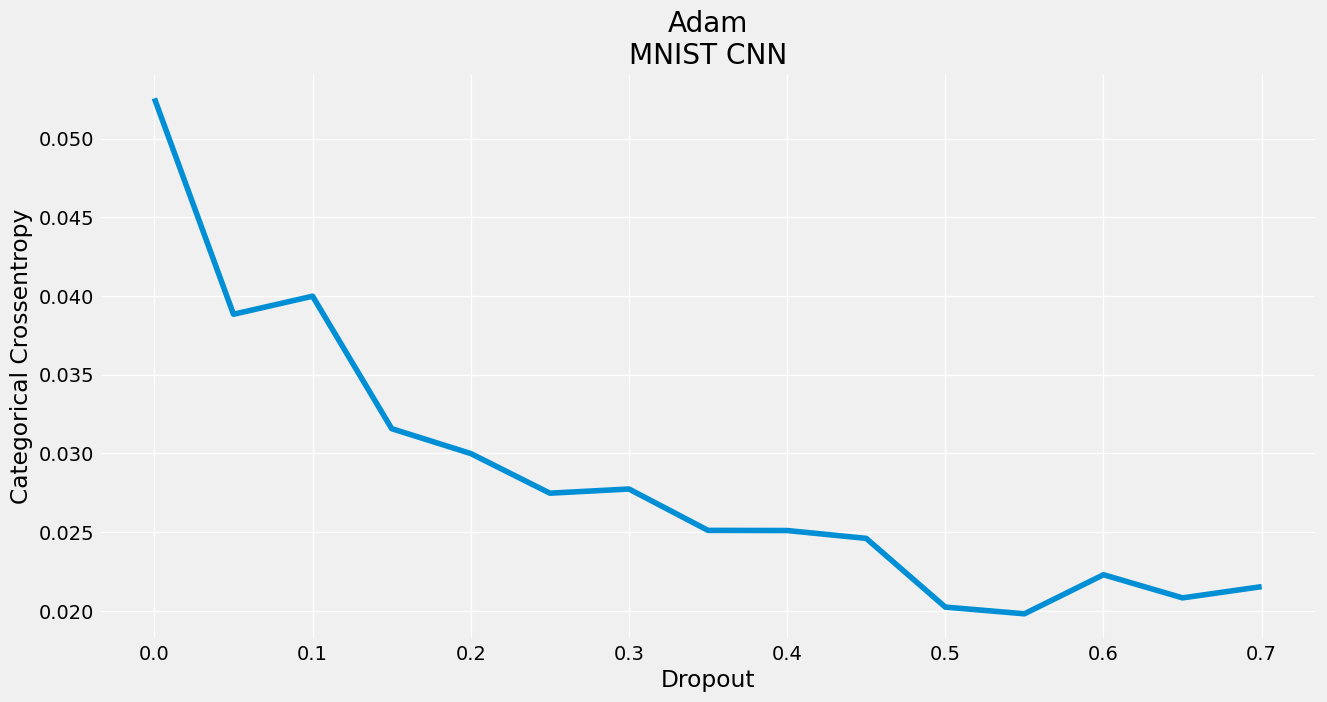

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(q,s)
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Dropout')
plt.title('Adam\nMNIST CNN')
plt.grid(color='white')
plt.show()

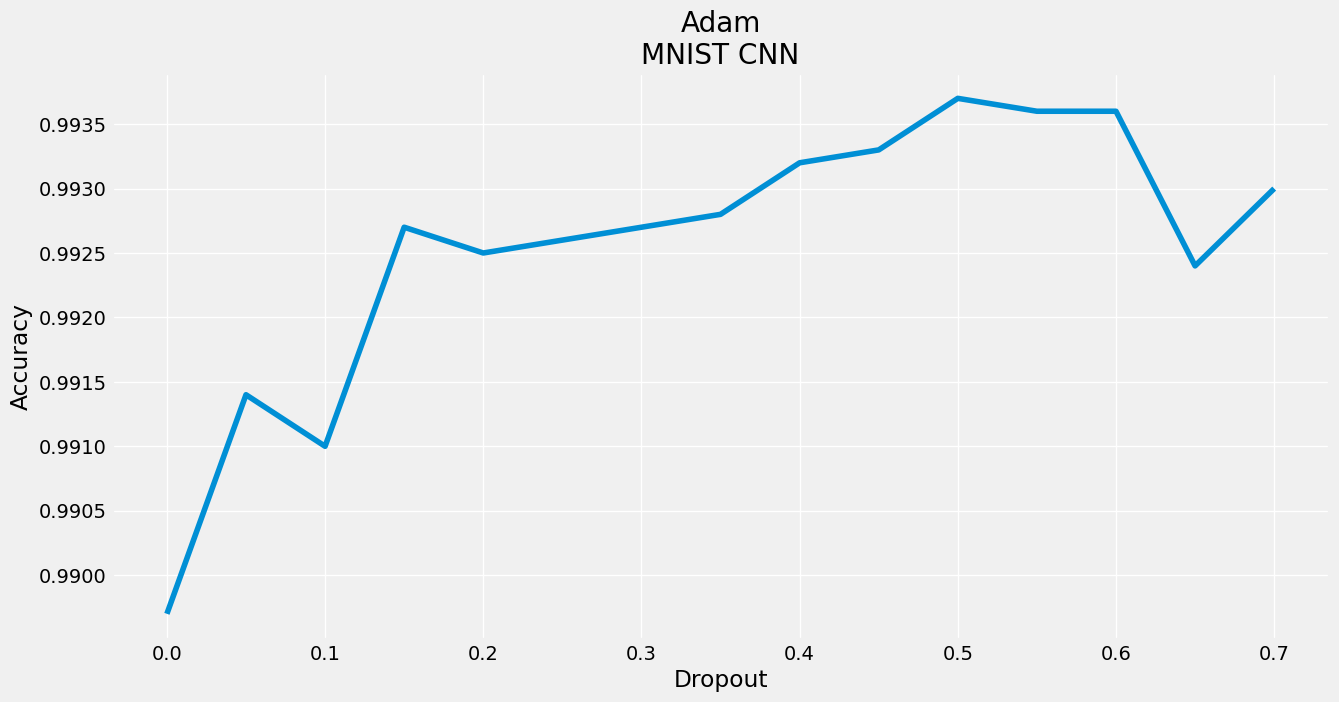

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(q,t)
plt.ylabel('Accuracy')
plt.xlabel('Dropout')
plt.title('Adam\nMNIST CNN')
plt.grid(color='white')
plt.show()

In [11]:
%%time
num_epochs=24
#q=np.arange(0.00,0.75,0.05)
#u=len(q)
#r=np.arange(u)
s24=np.zeros(u)
t24=np.zeros(u)
for i in r:
    drop_frac=q[i]
    h0,s0=model_build(drop_frac)
    s24[i]=s0[0]
    t24[i]=s0[1]
print("Timing:")

History Match: 0.0
Evaluate Model:
Test loss: 0.05991676077246666
Test accuracy: 0.9865000247955322


History Match: 0.05
Evaluate Model:
Test loss: 0.03940527141094208
Test accuracy: 0.991599977016449


History Match: 0.1
Evaluate Model:
Test loss: 0.03352447971701622
Test accuracy: 0.9905999898910522


History Match: 0.15000000000000002
Evaluate Model:
Test loss: 0.030233167111873627
Test accuracy: 0.991599977016449


History Match: 0.2
Evaluate Model:
Test loss: 0.026854781433939934
Test accuracy: 0.9927999973297119


History Match: 0.25
Evaluate Model:
Test loss: 0.029339175671339035
Test accuracy: 0.9916999936103821


History Match: 0.30000000000000004
Evaluate Model:
Test loss: 0.025634946301579475
Test accuracy: 0.9925000071525574


History Match: 0.35000000000000003
Evaluate Model:
Test loss: 0.02460521273314953
Test accuracy: 0.9926999807357788


History Match: 0.4
Evaluate Model:
Test loss: 0.024938266724348068
Test accuracy: 0.9923999905586243


History Match: 0.45
Evaluate 

In [12]:
%%time
num_epochs=16
#q=np.arange(0.00,0.75,0.05)
#u=len(q)
#r=np.arange(u)
s16=np.zeros(u)
t16=np.zeros(u)
for i in r:
    drop_frac=q[i]
    h0,s0=model_build(drop_frac)
    s16[i]=s0[0]
    t16[i]=s0[1]
print("Timing:")

History Match: 0.0
Evaluate Model:
Test loss: 0.03872169554233551
Test accuracy: 0.9908999800682068


History Match: 0.05
Evaluate Model:
Test loss: 0.033717621117830276
Test accuracy: 0.9911999702453613


History Match: 0.1
Evaluate Model:
Test loss: 0.026384182274341583
Test accuracy: 0.9925000071525574


History Match: 0.15000000000000002
Evaluate Model:
Test loss: 0.029301999136805534
Test accuracy: 0.991100013256073


History Match: 0.2
Evaluate Model:
Test loss: 0.02818145789206028
Test accuracy: 0.9923999905586243


History Match: 0.25
Evaluate Model:
Test loss: 0.026133185252547264
Test accuracy: 0.9918000102043152


History Match: 0.30000000000000004
Evaluate Model:
Test loss: 0.024660399183630943
Test accuracy: 0.9921000003814697


History Match: 0.35000000000000003
Evaluate Model:
Test loss: 0.02579713799059391
Test accuracy: 0.9922000169754028


History Match: 0.4
Evaluate Model:
Test loss: 0.02541559934616089
Test accuracy: 0.9916999936103821


History Match: 0.45
Evaluate

In [13]:
%%time
num_epochs=8
#q=np.arange(0.00,0.75,0.05)
#u=len(q)
#r=np.arange(u)
s08=np.zeros(u)
t08=np.zeros(u)
for i in r:
    drop_frac=q[i]
    h0,s0=model_build(drop_frac)
    s08[i]=s0[0]
    t08[i]=s0[1]
print("Timing:")

History Match: 0.0
Evaluate Model:
Test loss: 0.04021977633237839
Test accuracy: 0.9872999787330627


History Match: 0.05
Evaluate Model:
Test loss: 0.030011096969246864
Test accuracy: 0.9904000163078308


History Match: 0.1
Evaluate Model:
Test loss: 0.03602476418018341
Test accuracy: 0.9887999892234802


History Match: 0.15000000000000002
Evaluate Model:
Test loss: 0.030982336029410362
Test accuracy: 0.9897000193595886


History Match: 0.2
Evaluate Model:
Test loss: 0.03183232247829437
Test accuracy: 0.989300012588501


History Match: 0.25
Evaluate Model:
Test loss: 0.02827080711722374
Test accuracy: 0.9901000261306763


History Match: 0.30000000000000004
Evaluate Model:
Test loss: 0.028490960597991943
Test accuracy: 0.9907000064849854


History Match: 0.35000000000000003
Evaluate Model:
Test loss: 0.028495635837316513
Test accuracy: 0.9916999936103821


History Match: 0.4
Evaluate Model:
Test loss: 0.026034042239189148
Test accuracy: 0.9908000230789185


History Match: 0.45
Evaluate

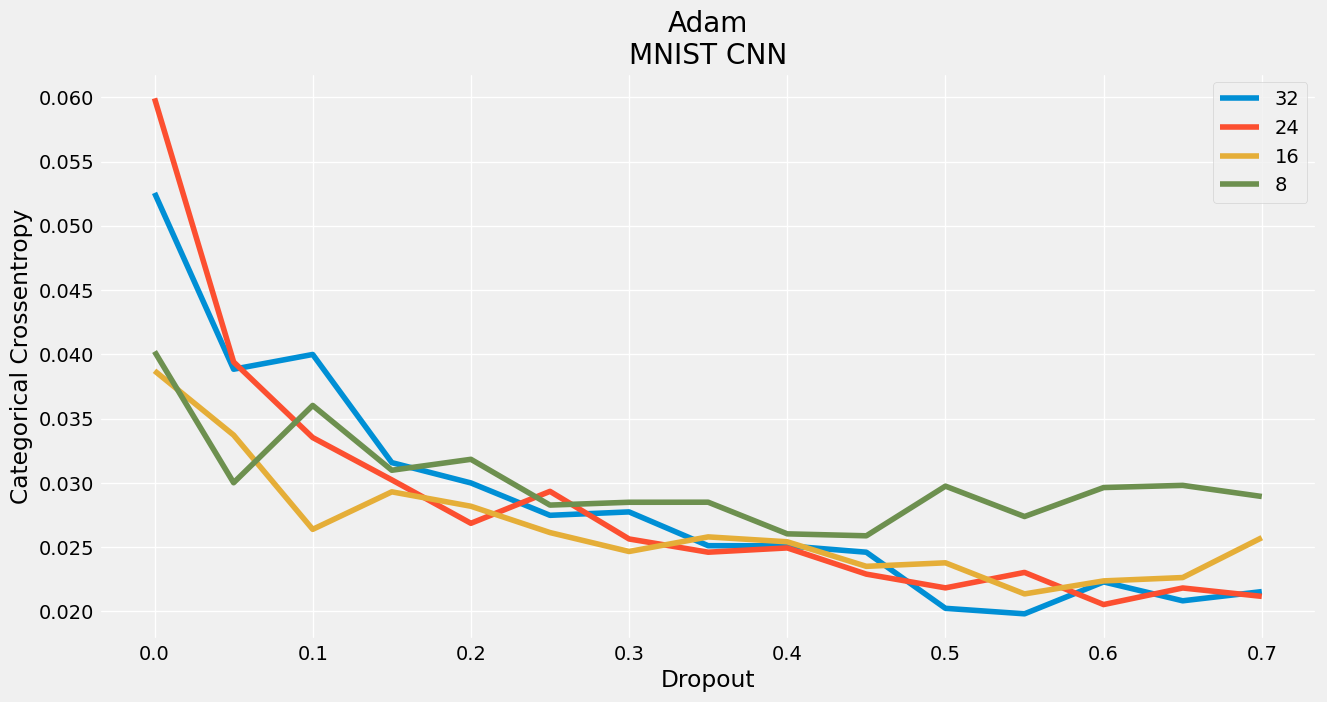

In [18]:
plt.figure(figsize=(14, 7))
plt.plot(q,s)
plt.plot(q,s24)
plt.plot(q,s16)
plt.plot(q,s08)
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Dropout')
plt.title('Adam\nMNIST CNN')
plt.grid(color='white')
plt.legend(['32','24','16','8'])
plt.show()

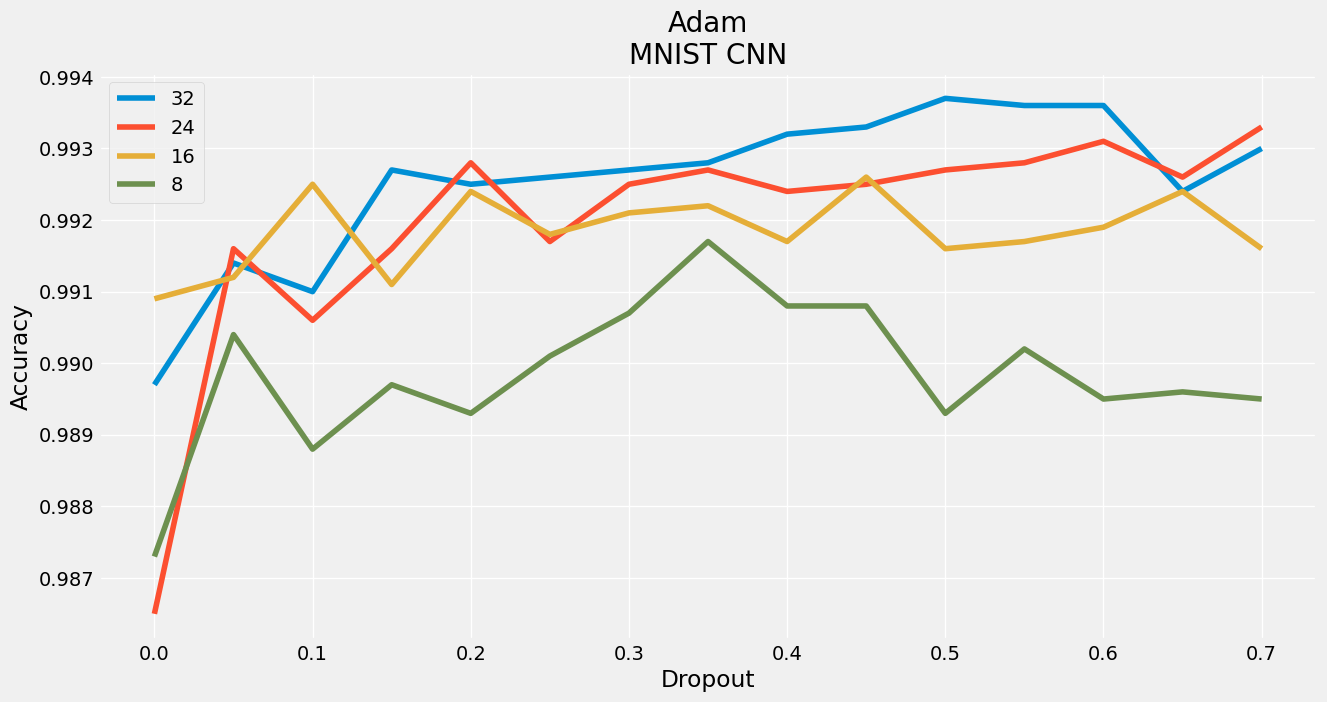

In [19]:
plt.figure(figsize=(14, 7))
plt.plot(q,t)
plt.plot(q,t24)
plt.plot(q,t16)
plt.plot(q,t08)
plt.ylabel('Accuracy')
plt.xlabel('Dropout')
plt.title('Adam\nMNIST CNN')
plt.grid(color='white')
plt.legend(['32','24','16','8'])
plt.show()